# Mushrooom Classification EDA and Prediction

#Requirements

[('matplotlib', '3.8.0'),
 ('numpy', '1.26.4'),
 ('pandas', '2.1.4'),
 ('plotly', '5.9.0'),
 ('scikit-learn', '1.2.2'),
 ('seaborn', '0.12.2')]

## Import Required Packages

In [368]:
#Import required packages


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, accuracy_score, recall_score

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',None)

## Import Mushroom Data Set

In [369]:
mushrooms_df = pd.read_csv('agaricus-lepiota.data', header=None)
display(mushrooms_df.head(10))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [370]:
mushroom_headers = [
'classes',
'cap-shape',
'cap-surface',
'cap-color',
'bruises',
'odor',
'gill-attachment',
'gill-spacing',
'gill-size',
'gill-color',
'stalk-shape',
'stalk-root',
'stalk-surface-above-ring',
'stalk-surface-below-ring',
'stalk-color-above-ring',
'stalk-color-below-ring',
'veil-type',
'veil-color',
'ring-number',
'ring-type',
'spore-print-color',
'population',
'habitat']

In [371]:
#set column headers
mushrooms_df.columns = mushroom_headers

## Perfom Exploratory Data Analysis

In [372]:
print(50*'#')
print('Check dataframe for missing values and object type')
print(50*'#')
display(mushrooms_df.info())
print(50*'#')
print('Check prevelence of edible and poisonous mushrooms\ne - Edible\nP - Poisonous')
print(50*'#')

#count occurrence of each value in 'team' column
counts = mushrooms_df['classes'].value_counts()

#count occurrence of each value in 'team' column as percentage of total 
percs = mushrooms_df['classes'].value_counts(normalize=True)

#concatenate results into one DataFrame
display(pd.concat([counts,percs], axis=1, keys=['count', 'percentage']))

print(50*'#')
print('display sample of dataframe')
print(50*'#')
display(mushrooms_df.head(10))

##################################################
Check dataframe for missing values and object type
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   classes                   8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 no

None

##################################################
Check prevelence of edible and poisonous mushrooms
e - Edible
P - Poisonous
##################################################


,count,percentage
classes,,
e,4208,0.517971
p,3916,0.482029


##################################################
display sample of dataframe
##################################################


,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [373]:
# Split column list into chunks to analyse
def divide_chunks(l, n): 
    # looping till length l 
    for i in range(0, len(l), n):  
        yield l[i:i + n] 
# set for features in each chunk 
n = 4
cols_to_analyse = list(divide_chunks(mushrooms_df.columns, n)) 

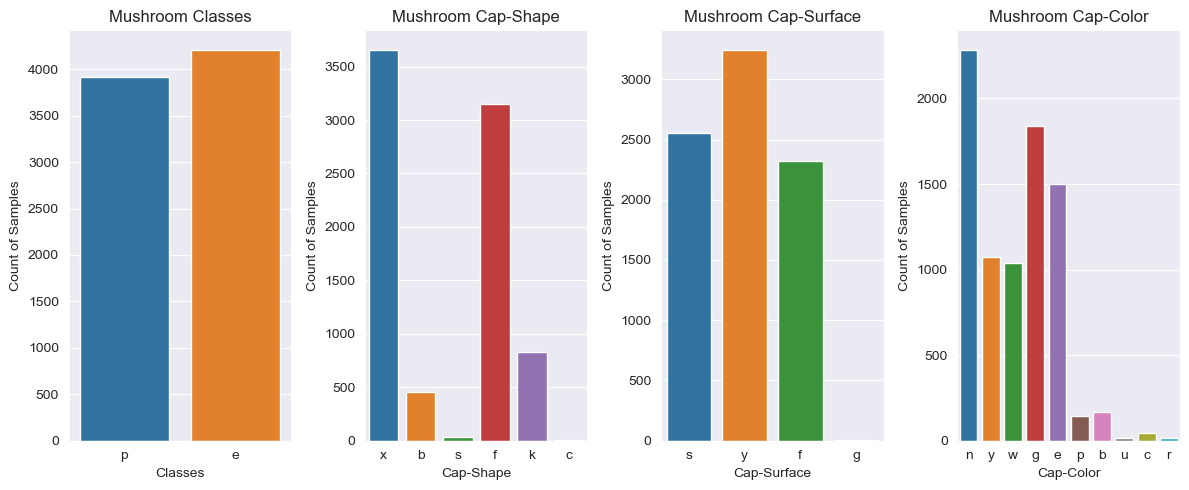

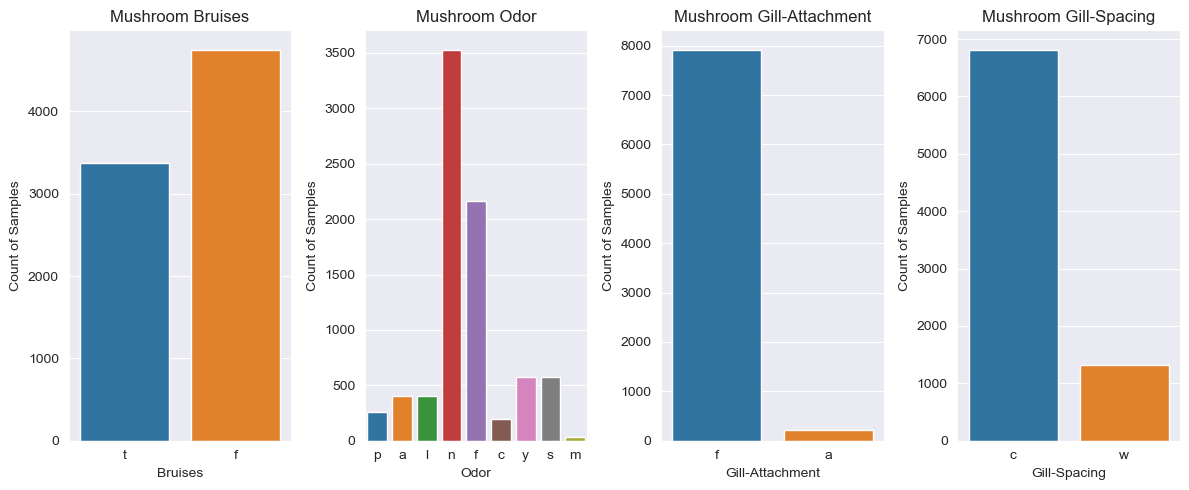

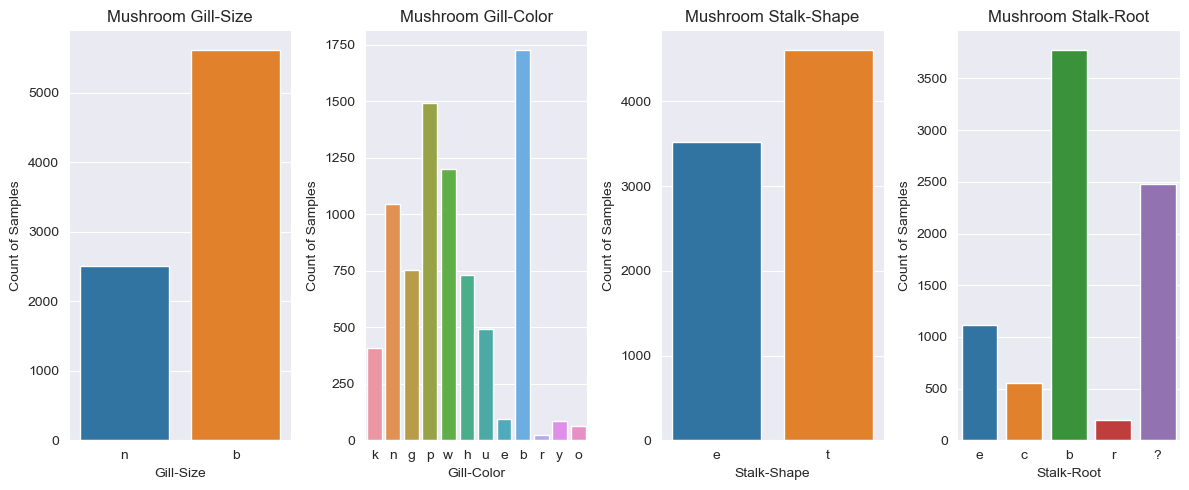

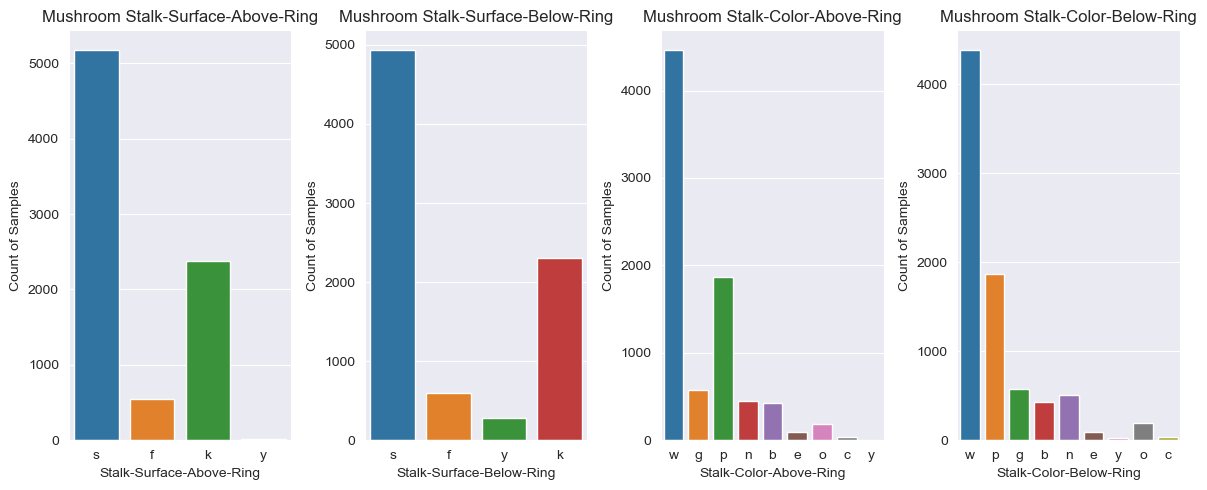

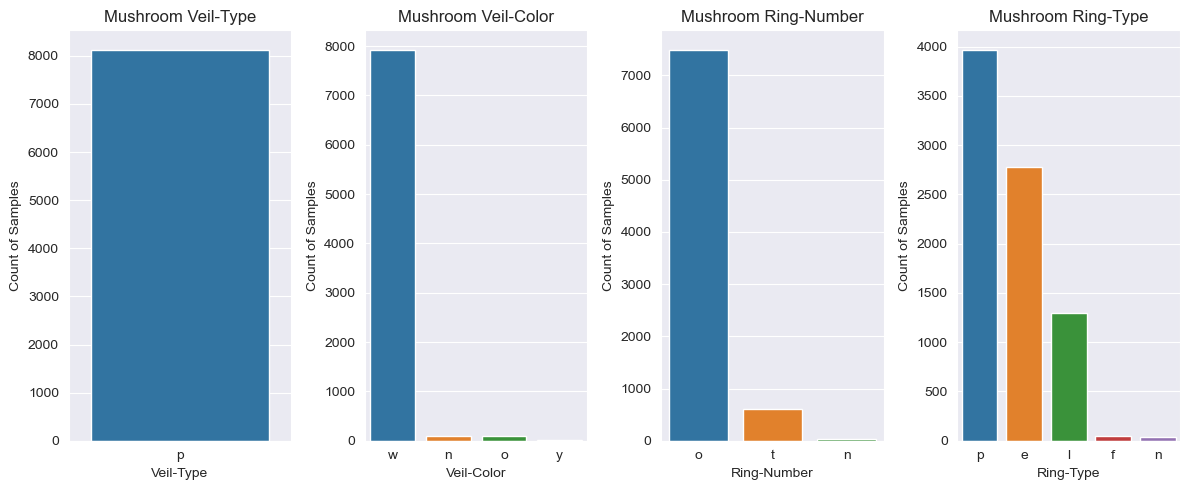

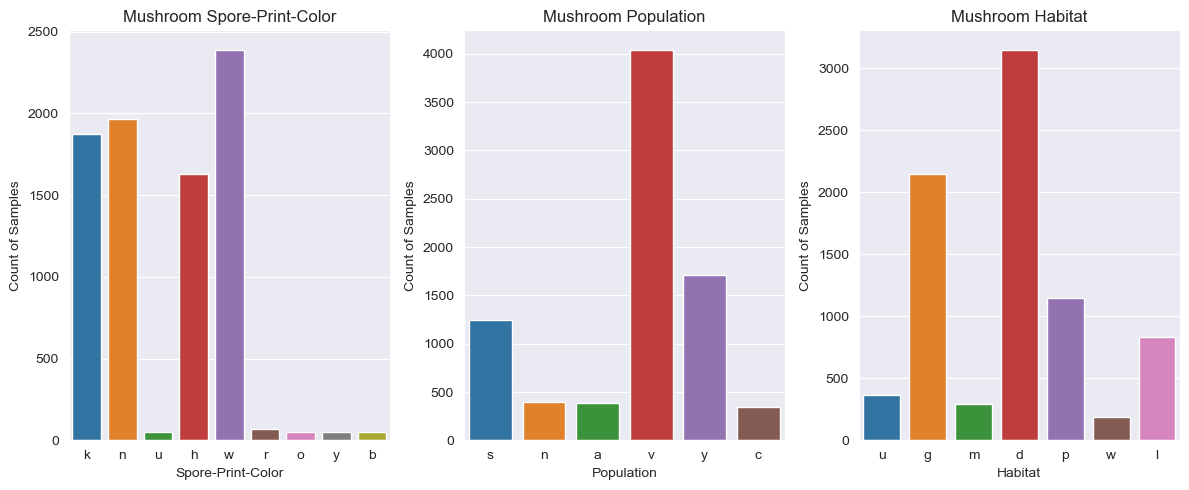

In [374]:
def feature_plot(cols):
    '''
    perform visual analysis of features
    view distributions
    unique subcategories
    '''
    f, axs = plt.subplots(1, len(cols), figsize=(12, 5))
    for ax, col in zip(axs, cols):
        sns.countplot(data=mushrooms_df, x=col, ax=ax)
        ax.set_ylabel('Count of Samples')
        ax.set_xlabel(col.title())
        ax.set_title('Mushroom' + ' ' + col.title())
    f.tight_layout()
    plt.show() 

for i in range(len(cols_to_analyse)):
    feature_plot(cols_to_analyse[i])

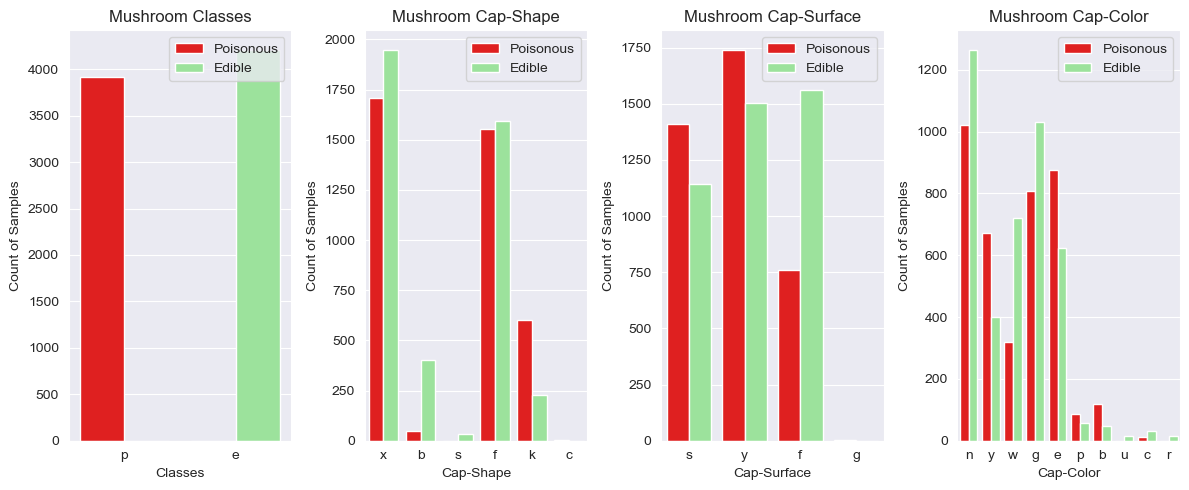

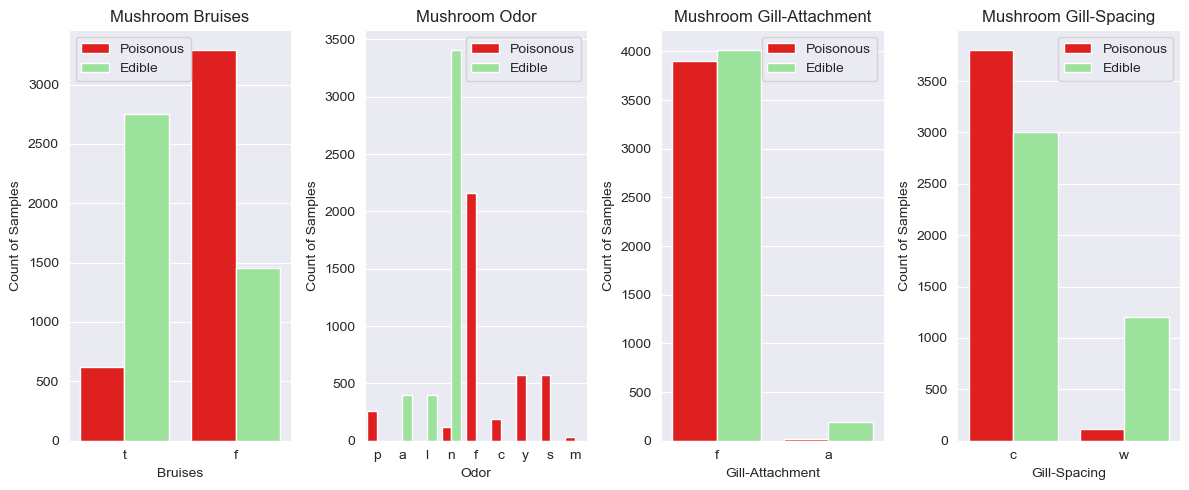

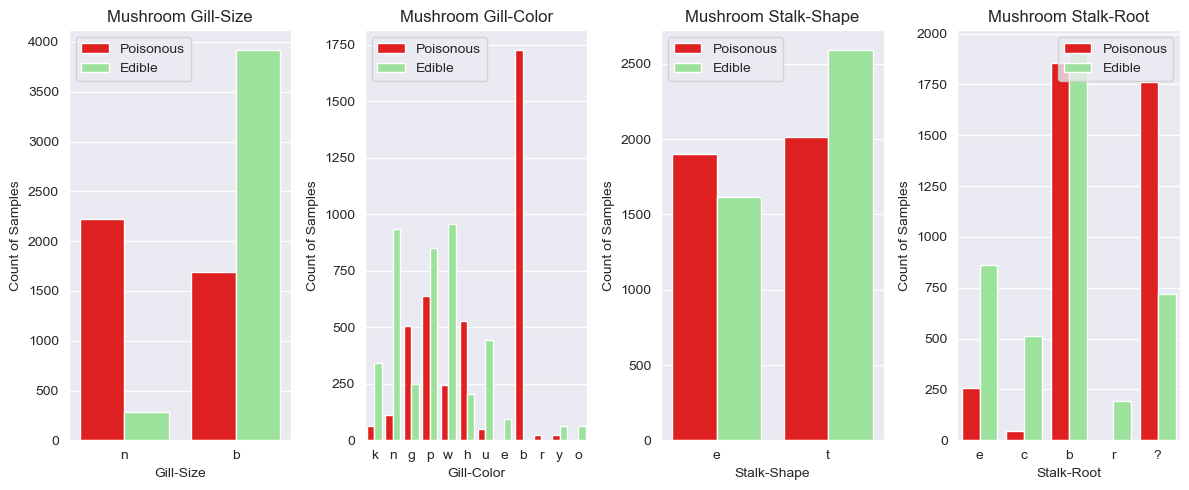

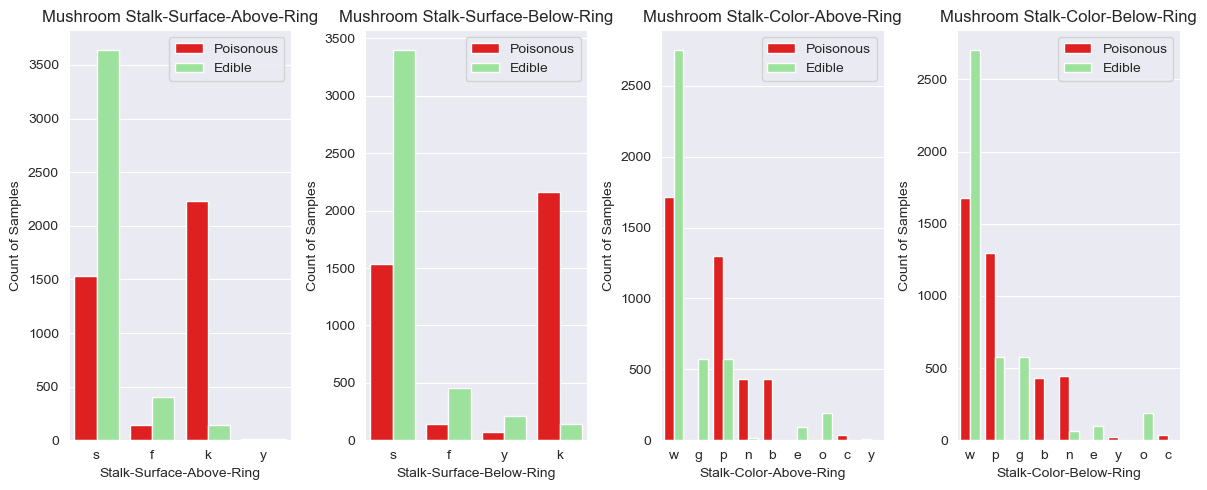

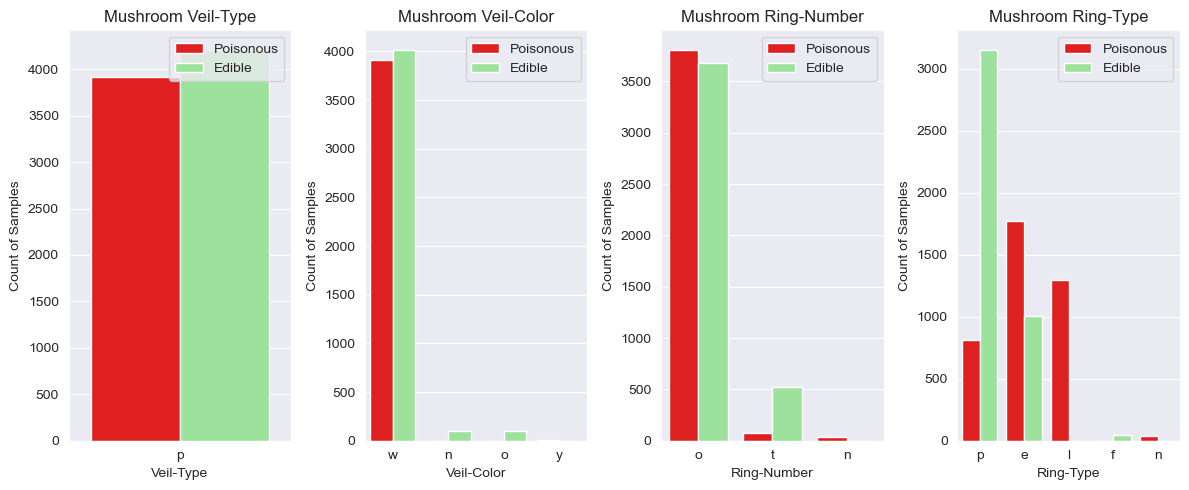

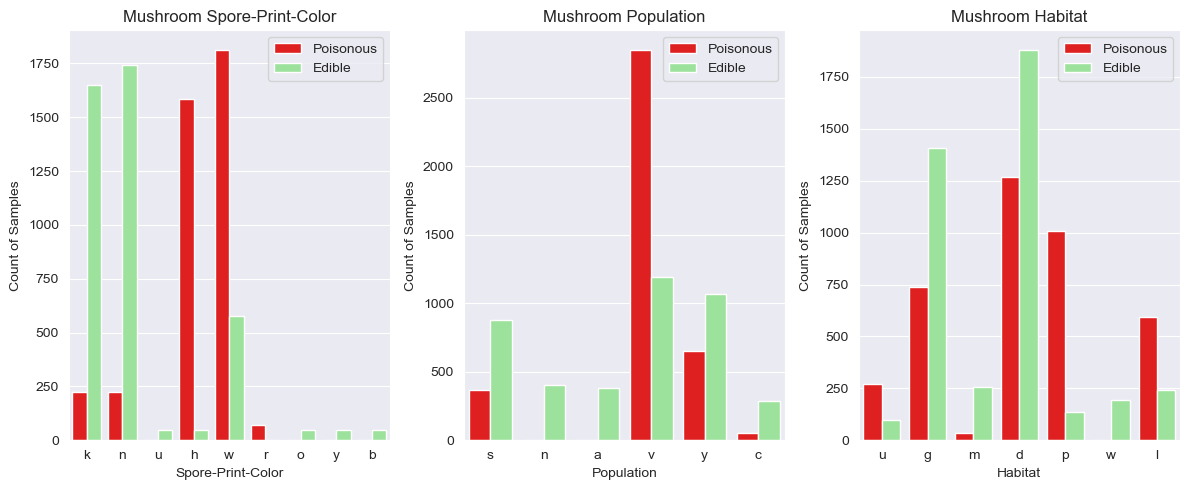

In [375]:
def class_plot(cols):
    '''
    perform visual analysis of features and their relationship with the class
    view distributions of edible vs poisonous mushrooms
    view unique subcategories
    '''
    f, axs = plt.subplots(1, len(cols), figsize=(12, 5))
    for ax, col in zip(axs, cols):
        hue_order = ['p', 'e']
        sns.countplot(data=mushrooms_df, x=col, hue='classes',hue_order= hue_order, palette=['red','lightgreen'], ax=ax)
        ax.set_ylabel('Count of Samples')
        ax.set_xlabel(col.title())
        ax.set_title('Mushroom' + ' ' + col.title())
        ax.legend(title=None,labels=['Poisonous','Edible'])
    f.tight_layout()
    plt.show() 

for i in range(len(cols_to_analyse)):
    class_plot(cols_to_analyse[i])

#Insights

1) Classes
Prevelence of edible and poisonous mushrooms are almost evenly split 51.7% and 48.2% respectively

2) Odor
Strong predictor when attempting to identify mushroom class
Almond (a) and Anise (l) odors appear ONLY in edible mushroom class
Pungent (p), foul (f), creosote (c), fishy (y), spicy (s) and musty (m) appear ONLY in poisonous mushroom class
None (n) appears in BOTH edible and poisonous mushroom class

3) Veil Type
Has only one value for all samples - this feature can be removed from the model it will have no predictive power for this classification task.

4) Stalk Root
contains ? values

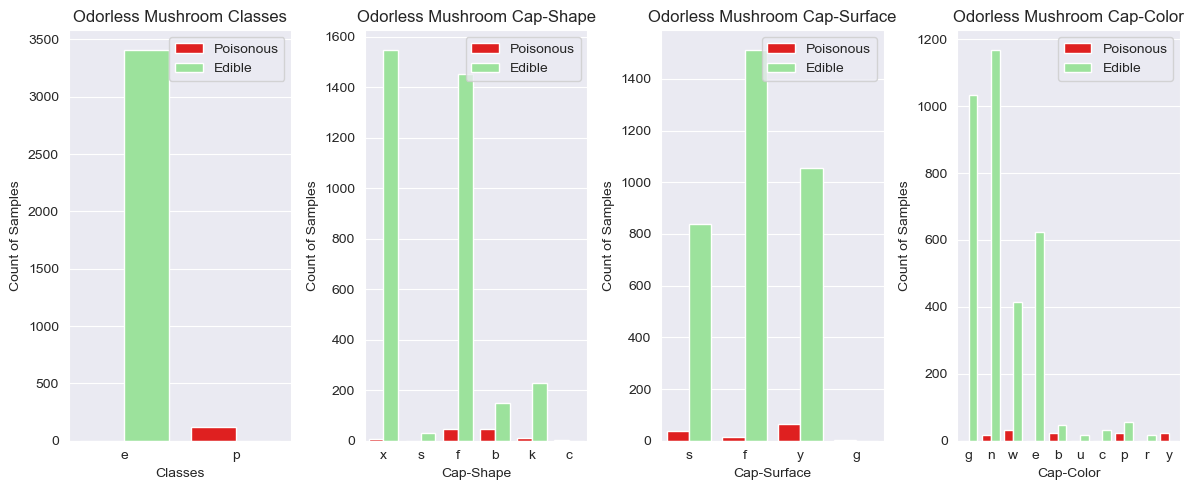

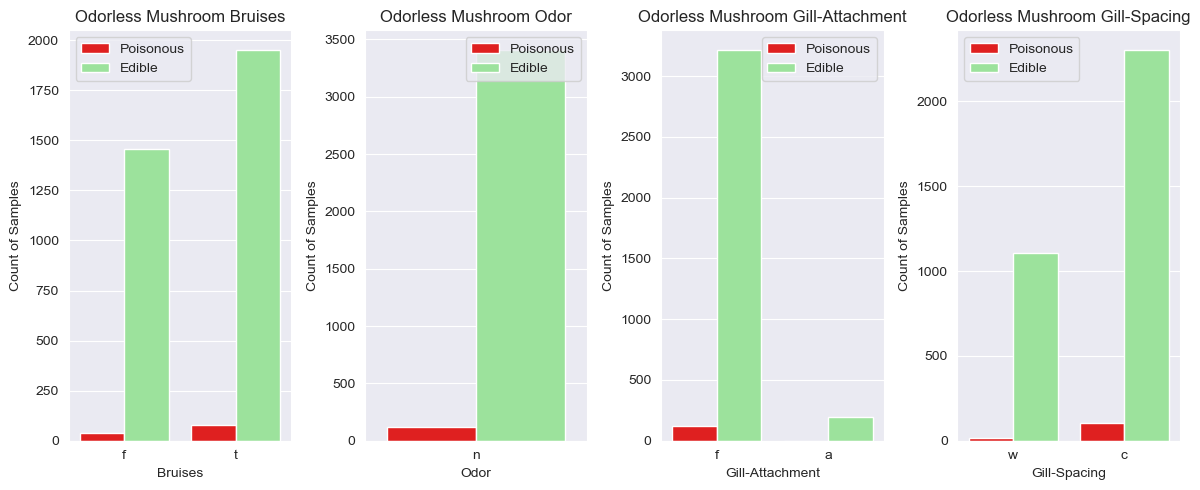

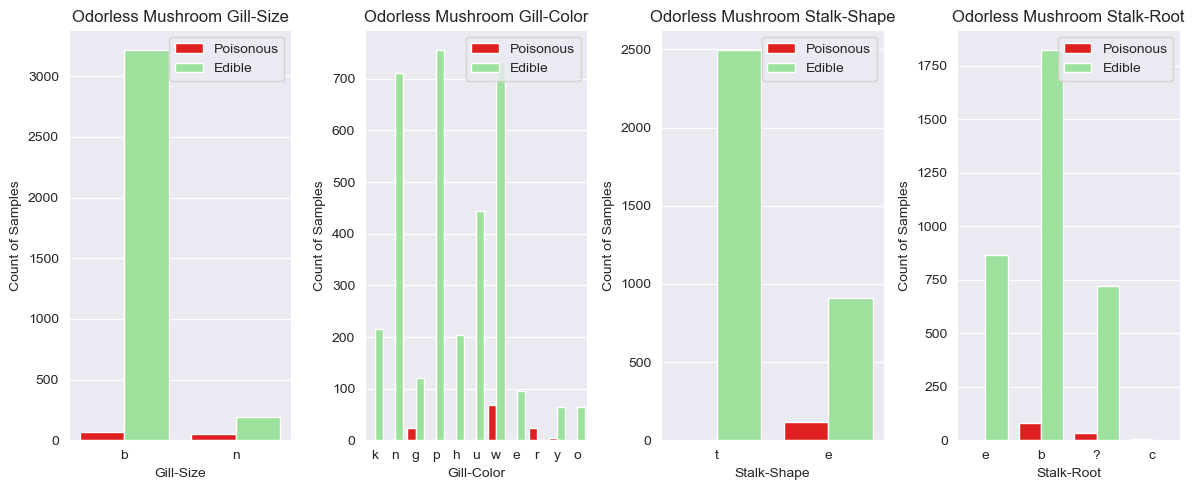

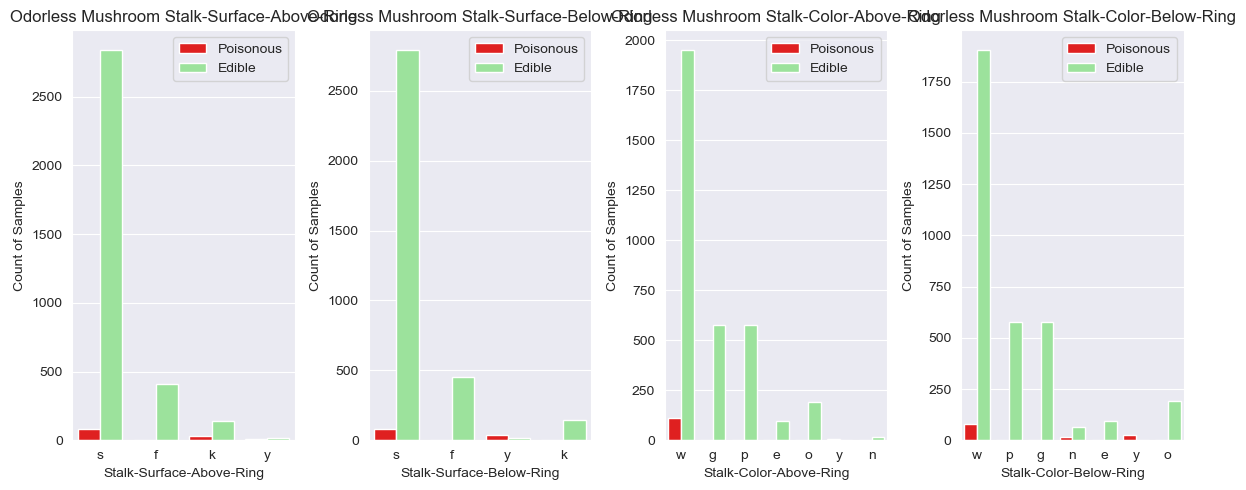

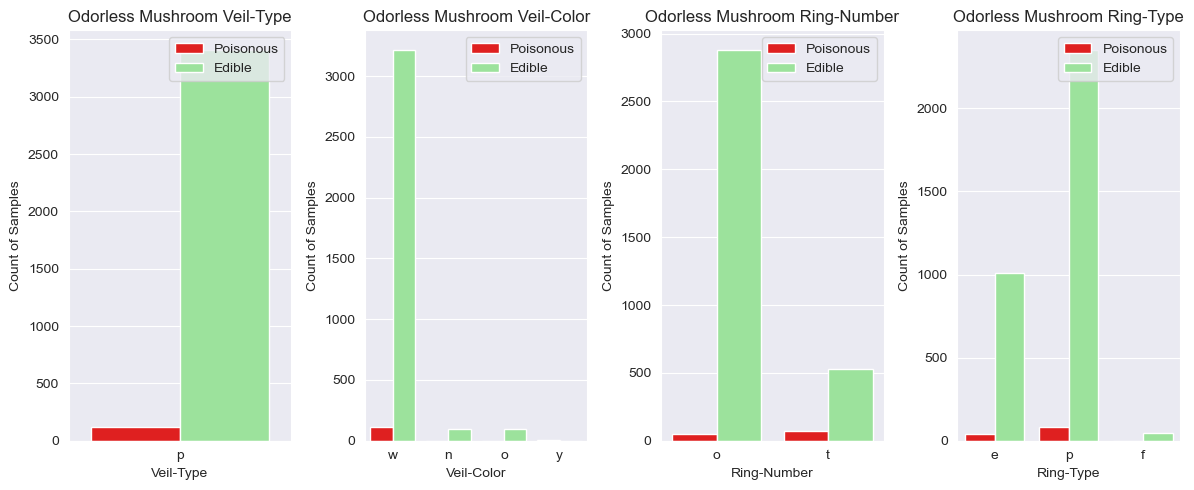

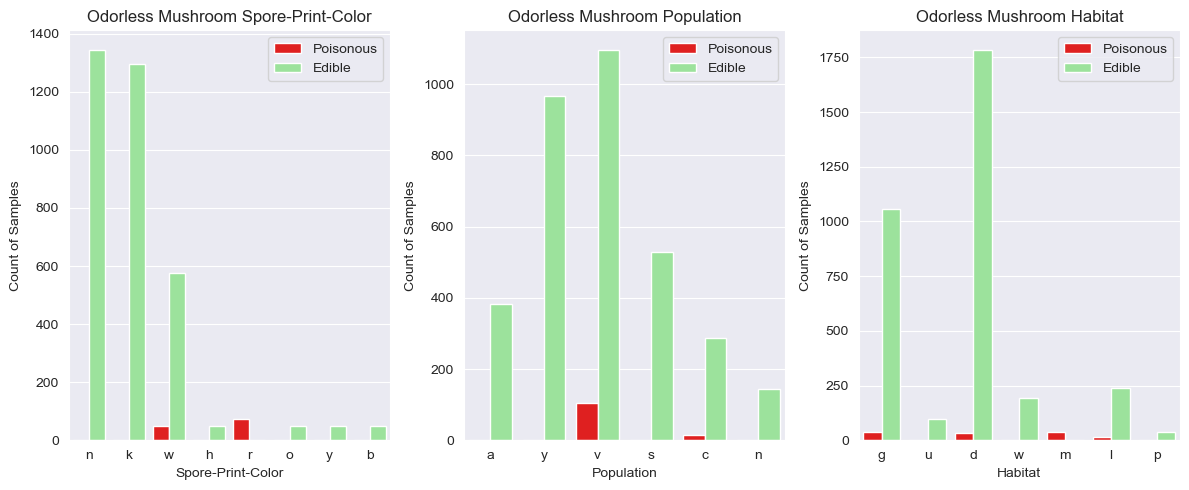

In [376]:
#odor plot
def odor_none_drill_down(cols):
    '''
    perform visual analysis of features where mushroom is oderless (n)
    view distributions
    unique subcategories
    '''
    f, axs = plt.subplots(1, len(cols), figsize=(12, 5))
    for ax, col in zip(axs, cols):
        hue_order = ['p', 'e']
        sns.countplot(data=mushrooms_df[mushrooms_df['odor']=='n'], x=col, hue='classes',hue_order = ['p', 'e'], palette=['red','lightgreen'], ax=ax)
        ax.set_ylabel('Count of Samples')
        ax.set_xlabel(col.title())
        ax.set_title('Odorless Mushroom' + ' ' + col.title())
        ax.legend(title=None,labels=['Poisonous','Edible'])
    f.tight_layout()
    plt.show() 

for i in range(len(cols_to_analyse)):
    odor_none_drill_down(cols_to_analyse[i])

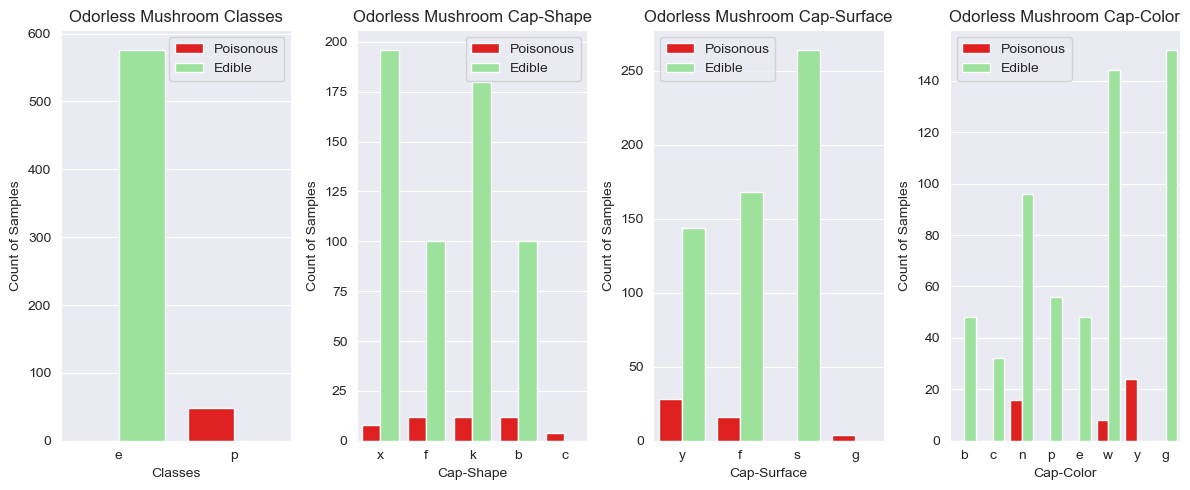

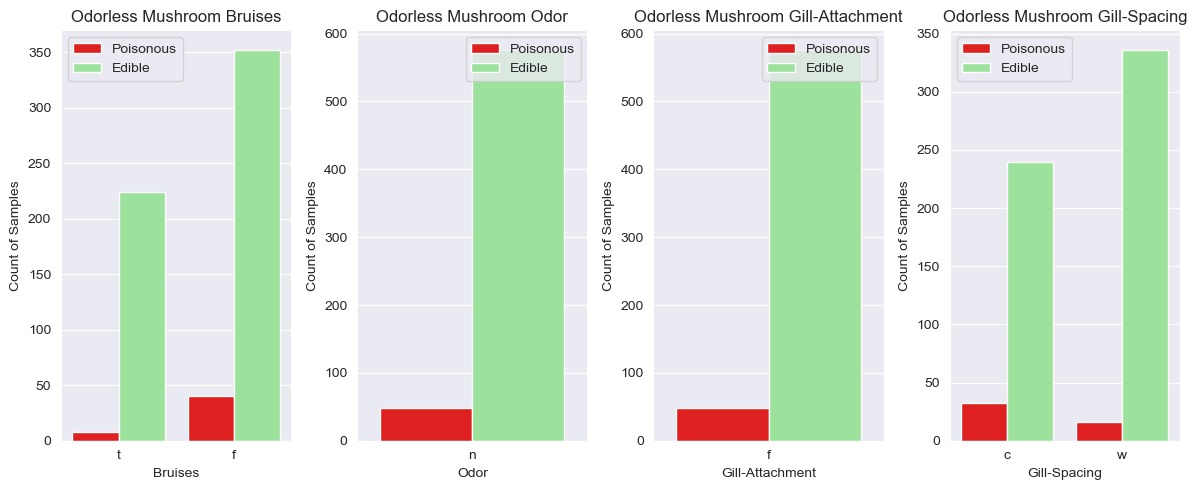

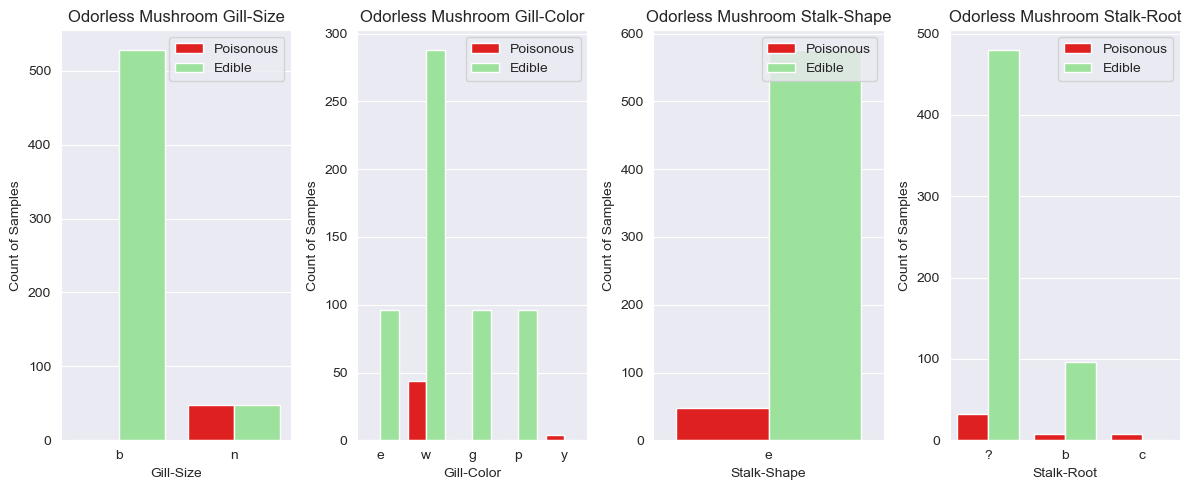

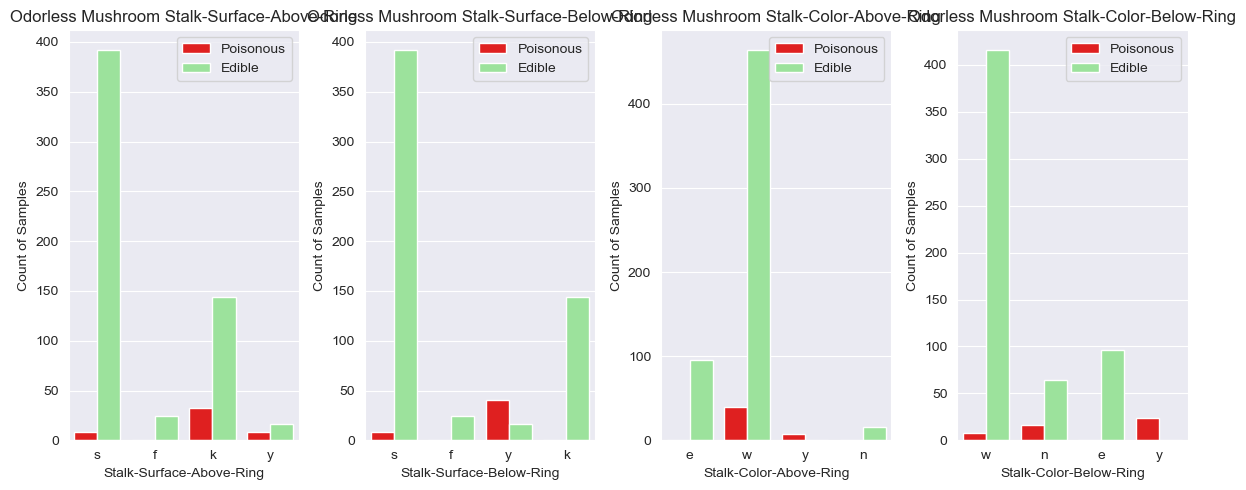

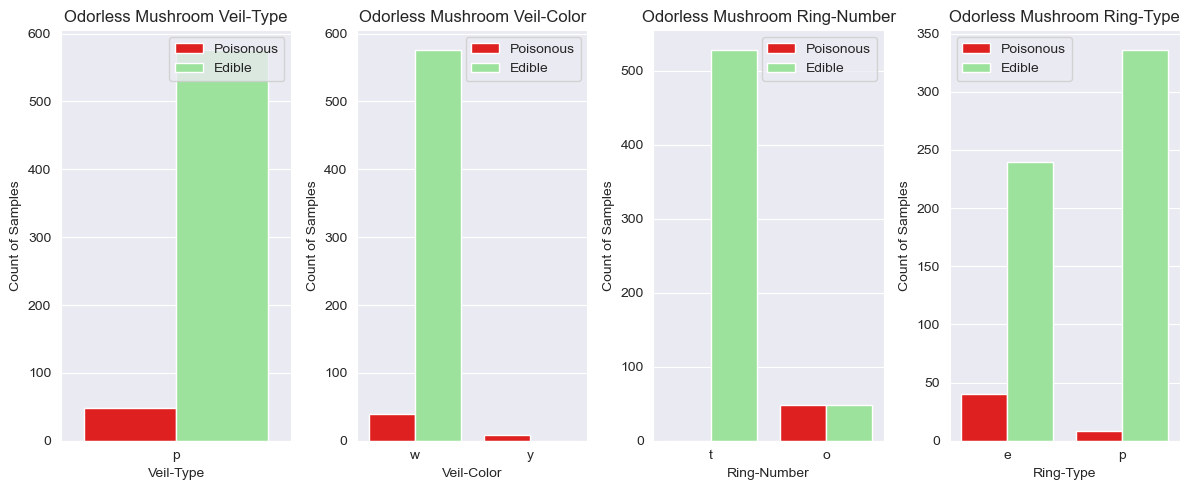

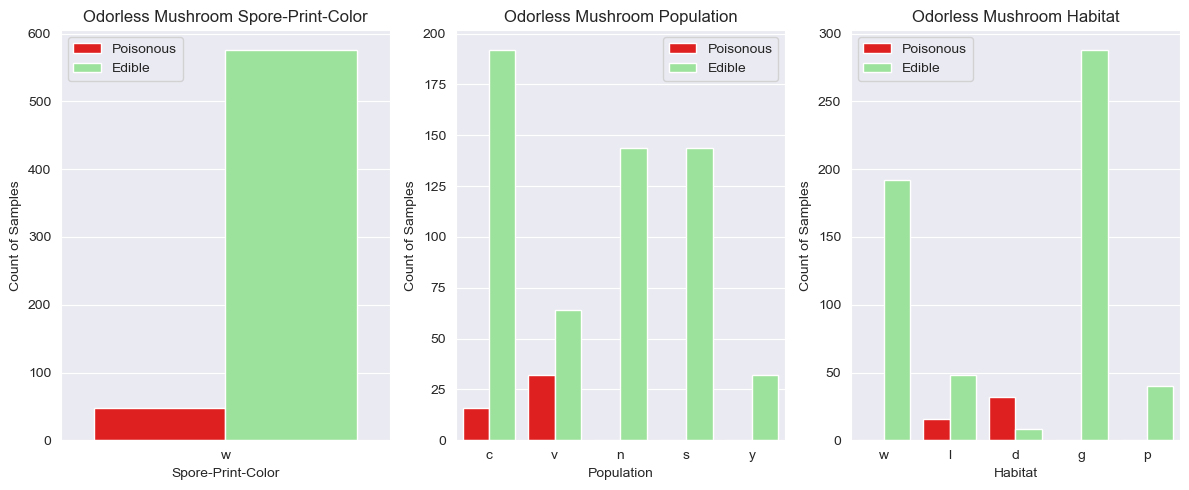

In [377]:
#odor and spore-print-color plot
#visualise features where mushroom is odorless (n)
def odor_none_drill_down(cols):
    f, axs = plt.subplots(1, len(cols), figsize=(12, 5))
    for ax, col in zip(axs, cols):
        hue_order = ['p', 'e']
        sns.countplot(data=mushrooms_df[(mushrooms_df['odor']=='n')&(mushrooms_df['spore-print-color']=='w')], x=col, hue='classes',hue_order = ['p', 'e'], palette=['red','lightgreen'], ax=ax)
        ax.set_ylabel('Count of Samples')
        ax.set_xlabel(col.title())
        ax.set_title('Odorless Mushroom' + ' ' + col.title())
        ax.legend(title=None,labels=['Poisonous','Edible'])
    f.tight_layout()
    plt.show() 

for i in range(len(cols_to_analyse)):
    odor_none_drill_down(cols_to_analyse[i])

In [385]:
display(mushrooms_df[(mushrooms_df['odor']=='n')&(mushrooms_df['spore-print-color']=='w')][['odor','spore-print-color','gill-size','stalk-surface-above-ring','ring-number','classes']].value_counts())

odor  spore-print-color  gill-size  stalk-surface-above-ring  ring-number  classes
n     w                  b          s                         t            e          368
                                    k                         t            e          144
                         n          k                         o            p           32
                                    f                         o            e           24
                                    s                         o            e           24
                         b          y                         t            e           16
                         n          s                         o            p            8
                                    y                         o            p            8
Name: count, dtype: int64

In [424]:
df = mushrooms_df.copy()

labels = df['classes']
#features = df[['odor']]#,'gill-size','spore-print-color','stalk-surface-below-ring','gill-color', 'ring-number']]
features = df.drop(['classes','veil-type'], axis=1) # remove target and drop veil (unpredictive feature)
#replace ? with m (missing category_
def replace_missing_stalk_root(x):
    if x['stalk-root'] == '?':
        return 'm'
    else:
        return x['stalk-root']
features['stalk-root'] = features.apply(replace_missing_stalk_root, axis=1)


#endode target class, 1 is poisonous and 0 is edible
labels = pd.get_dummies(labels, dtype=int)['p']

#use columns as every feature is categorical 
categorical = features.columns 
#use one hot encoding to convert all categorical to numerical - ready for model ingestion
features = pd.concat([features, pd.get_dummies(features[categorical], dtype=int)], axis=1)
#drop original features, leaving only newly encoded ones
features.drop(categorical, axis=1, inplace=True)

#split dataset into train test, 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=0)


In [425]:
#Function For Train Prediction Pipeline

def train_and_predict(model, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - model: learning algorithm to be used for training and predictions
       - sample_size: size of samples to be drawn from training set
       - X_train: training set
       - y_train: training set
       - X_test: testing set
       - y_test: testing set
    '''
    
    results = {}
   
    start = time() # Get start time
    model = model.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    results['train_time'] = end - start
        
    start = time() # Get start time
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train[:300])
    end = time() # Get end time
    
    results['pred_time'] = end - start
            
    results['acc_train_holdout'] = accuracy_score(y_train[:300],predictions_train)
        
    results['acc_test'] = accuracy_score(y_test,predictions_test)

    results['recall_train_holdout'] = recall_score(y_train[:300],predictions_train)
        
    results['recall_test'] = recall_score(y_test,predictions_test)
    
    results['f_train_holdout'] = fbeta_score(y_train[:300],predictions_train, beta=0.5)
        
    results['f_test'] = fbeta_score(y_test,predictions_test, beta=0.5)
       
    print("{} trained on {} samples".format(model.__class__.__name__, sample_size))
        
    return results

In [426]:
from time import time

clf_A = GaussianNB()
clf_B = RandomForestClassifier()
clf_C = KNeighborsClassifier()

training_length = len(X_train)
samples_10 = int(training_length * 0.1)
samples_50 = int(training_length * 0.5)
samples_100 = int(training_length * 1)

results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_10, samples_50, samples_100]):
        results[clf_name][i] = \
        train_and_predict(clf, samples, X_train, y_train, X_test, y_test)

GaussianNB trained on 609 samples
GaussianNB trained on 3046 samples
GaussianNB trained on 6093 samples
RandomForestClassifier trained on 609 samples
RandomForestClassifier trained on 3046 samples
RandomForestClassifier trained on 6093 samples
KNeighborsClassifier trained on 609 samples
KNeighborsClassifier trained on 3046 samples
KNeighborsClassifier trained on 6093 samples


In [427]:
print(50*'#')
print('GaussianNB')
print(50*'#')
display(pd.DataFrame([results['GaussianNB'][0]]))
display(pd.DataFrame([results['GaussianNB'][1]]))
display(pd.DataFrame([results['GaussianNB'][2]]))
print(50*'#')
print('KNeighborsClassifier')
print(50*'#')
display(pd.DataFrame([results['KNeighborsClassifier'][0]]))
display(pd.DataFrame([results['KNeighborsClassifier'][1]]))
display(pd.DataFrame([results['KNeighborsClassifier'][2]]))
print(50*'#')
print('RandomForestClassifier')
print(50*'#')
display(pd.DataFrame([results['RandomForestClassifier'][0]]))
display(pd.DataFrame([results['RandomForestClassifier'][1]]))
display(pd.DataFrame([results['RandomForestClassifier'][2]]))



##################################################
GaussianNB
##################################################


,train_time,pred_time,acc_train_holdout,acc_test,recall_train_holdout,recall_test,f_train_holdout,f_test
0,0.004006,0.013943,0.99,0.992122,1.0,1.0,0.983936,0.986976


,train_time,pred_time,acc_train_holdout,acc_test,recall_train_holdout,recall_test,f_train_holdout,f_test
0,0.010664,0.010525,0.973333,0.972427,1.0,1.0,0.958279,0.955853


,train_time,pred_time,acc_train_holdout,acc_test,recall_train_holdout,recall_test,f_train_holdout,f_test
0,0.015959,0.00991,0.953333,0.966027,1.0,1.0,0.929204,0.946157


##################################################
KNeighborsClassifier
##################################################


,train_time,pred_time,acc_train_holdout,acc_test,recall_train_holdout,recall_test,f_train_holdout,f_test
0,0.002981,0.130868,0.996667,0.992614,1.0,0.997938,0.994587,0.988966


,train_time,pred_time,acc_train_holdout,acc_test,recall_train_holdout,recall_test,f_train_holdout,f_test
0,0.004189,0.253489,1.0,1.0,1.0,1.0,1.0,1.0


,train_time,pred_time,acc_train_holdout,acc_test,recall_train_holdout,recall_test,f_train_holdout,f_test
0,0.006619,0.421834,1.0,1.0,1.0,1.0,1.0,1.0


##################################################
RandomForestClassifier
##################################################


,train_time,pred_time,acc_train_holdout,acc_test,recall_train_holdout,recall_test,f_train_holdout,f_test
0,0.138369,0.041763,1.0,0.996061,1.0,0.991753,1.0,0.99834


,train_time,pred_time,acc_train_holdout,acc_test,recall_train_holdout,recall_test,f_train_holdout,f_test
0,0.216033,0.031523,1.0,1.0,1.0,1.0,1.0,1.0


,train_time,pred_time,acc_train_holdout,acc_test,recall_train_holdout,recall_test,f_train_holdout,f_test
0,0.301273,0.037868,1.0,1.0,1.0,1.0,1.0,1.0


In [428]:
#Best Model


import time

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

forest_importances

# fig, ax = plt.subplots()
# forest_importances[:10].plot.bar(yerr=std, ax=ax)
# #forest_importances.sort_values(ascending=False)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()



Elapsed time to compute the importances: 0.008 seconds


odor_n                        0.127088
odor_f                        0.071620
gill-size_b                   0.071188
gill-size_n                   0.068423
spore-print-color_h           0.051921
stalk-surface-below-ring_k    0.045697
stalk-surface-above-ring_k    0.044810
gill-color_b                  0.044059
stalk-surface-above-ring_s    0.029333
ring-type_p                   0.029285
bruises_t                     0.021700
spore-print-color_k           0.019689
population_v                  0.018355
ring-type_l                   0.017773
odor_p                        0.015877
bruises_f                     0.015215
stalk-shape_t                 0.013679
gill-spacing_w                0.013063
stalk-root_b                  0.012489
stalk-shape_e                 0.012174
spore-print-color_n           0.011865
spore-print-color_w           0.010863
gill-spacing_c                0.010232
odor_l                        0.010027
ring-type_e                   0.009837
stalk-surface-below-ring_

In [429]:
top_features = pd.DataFrame(forest_importances)
top_features = top_features.reset_index()
top_features.columns = ['Feature','Importance']
top_6_features =  top_features['Feature'].head(6).to_list()
display(top_6_features)

['odor_n',
 'odor_f',
 'gill-size_b',
 'gill-size_n',
 'spore-print-color_h',
 'stalk-surface-below-ring_k']

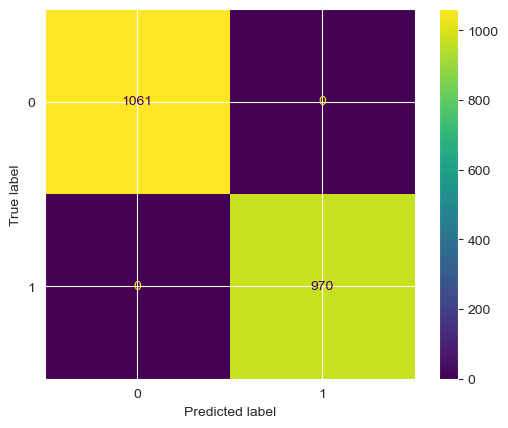

In [430]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

Using a limited number of features can help someone foraging for mushrooms decide if a mush room is edible or poisonous

#Insights Poisonous Mushrooms

Perform test in order
1) Odor - 
If mushroom has a noticeable odor, especially an unpleasant one, it is likely poisonous.
Once mushroom fails smell test its best to assume its poison this captures 97.2% of poisonous mushrooms.
No need to bother with other test risk is too high.
3) Spore Print Color - 
If spore print color is chocolate, white or green then the mushroom is likely poisonous
4) Gill Size - 
If the gills are narrow it is likely to be poisonous
5) Gill Color - 
If gill color is buff, white or yellow then mushroom is likly poisonous
6) Stalk Surface Below Ring - 
If stalk surface below ring is smooth or scaly then mushroom is likely poisonous
7) Ring Number - 
If ring number is one then mushroom is likely poisonous

#Insights Edible Mushrooms

Perform test in order

1) Odor - 
If mushroom has no odor or has almond or anise smell then mushroom is likely to be edible, further checks required to confirm.
2) Spore Print Color - 
If spore print color brown, black, chocolate, orange, yellow or buff then mushrooms are edible
3) Gill Size - 
If the gills are broad then mushrooms are edible
4) Gill Color - 
If gill color red, grey or pink then mushrooms are edible
5) Stalk Surface Below Ring - 
If stalk surface below ring fibrous or silky then mushrooms are edible
6) Ring Number - 
If ring number, mushrooms with two are edible

if you follow these guidlines strictly the likelihood of you selecting edible mushrooms is about 100%
